# Exploring the Julia Set in Julia

In [3]:
const maxiter = 100

doc"""
Compute the *escape time* of the Julia set at $(z, c)$.  
"""
function julia(z::Complex, c::Complex)  # keyword argument
    
    for n in 1:maxiter
        abs2(z) > 4 && return n     # "short-circuiting" and = if-then
        z = z*z + c
    end
    
    return maxiter
end

julia

In [4]:
?Main.julia

Compute the *escape time* of the Julia set at $(z, c)$.  


(Note that we can use Markdown syntax in the docstring, and LaTeX when using `doc"""..."""` instead of """...""".)

In [5]:
julia(-0.06 + 0.665im, -0.06 + 0.665im)

28

In [6]:
@code_native julia(-0.02 + 0.7im, -0.06 + 0.665im)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[3]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 8
	movsd	(%rdi), %xmm1           ## xmm1 = mem[0],zero
	movsd	8(%rdi), %xmm0          ## xmm0 = mem[0],zero
	movl	$1, %eax
	movabsq	$4646103304, %rcx       ## imm = 0x114EDE908
	nopl	(%rax)
Source line: 9
L32:
	movapd	%xmm1, %xmm2
	mulsd	%xmm2, %xmm2
	movapd	%xmm0, %xmm3
	mulsd	%xmm3, %xmm3
	movapd	%xmm3, %xmm4
	addsd	%xmm2, %xmm4
	ucomisd	(%rcx), %xmm4
	ja	L103
Source line: 8
	incq	%rax
Source line: 10
	subsd	%xmm3, %xmm2
	mulsd	%xmm1, %xmm0
	addsd	%xmm0, %xmm0
	addsd	(%rsi), %xmm2
	addsd	8(%rsi), %xmm0
Source line: 8
	cmpq	$101, %rax
	movapd	%xmm2, %xmm1
	jne	L32
Source line: 13
	movl	$100, %eax
	popq	%rbp
	retq
Source line: 9
L103:
	popq	%rbp
	retq
	nopl	(%rax)


In [7]:
[julia(r + i*im, -0.06 + 0.665im) for r in -1:0.002:1, i in -0.5:0.002:0.5]

1001×501 Array{Int64,2}:
  3   3   3   3   3    3    3    3    3  …   72   38   36  36  35  34  34  34
  3   3   3   3   3    3    3    3    3     100   39   37  36  35  34  34  33
  3   3   3   3   3    3    3    3    3      77  100  100  37  34  34  33  33
  3   3   3   3   3    3    3    3    3      57  100   46  35  34  33  33  33
  3   3   3   3   3    3    3    3    3      62   68   37  35  33  33  33  32
  3   3   3   3   3    3    3    3    3  …   90  100   36  34  33  33  32  32
  3   3   3   3   3    3    3    3    3     100   45   74  35  33  32  32  32
  3   3   3   3   3    3    3    3    3      57   92   55  59  32  32  31  31
  3   3   3   3   3    3    3    3    3      62   43   36  32  31  31  31  31
  3   3   3   3   3    3    3    3    3      68   34   32  31  30  30  30  31
  3   3   3   3   3    3    3    3    3  …   67   36   31  30  30  30  30  30
  3   3   3   3   3    3    3    3    3      65   59   30  29  29  29  30  30
  3   3   3   3   3    3    3    3    3

## Adding some colour

In [2]:
# Install required packages:
# Pkg.add("Images")
# Pkg.add("ImageMagick")
# Pkg.add("QuartzImageIO")

In [8]:
using Colors, Images, ImageMagick

In [9]:
const cmap = colormap("RdBu", 100)

In [14]:
?colormap

search: colormap colormatch cie_color_match weighted_color_mean colorim colordim



```
colormap(cname, [N; mid, logscale, kvs...])
```

Returns a predefined sequential or diverging colormap computed using the algorithm by Wijffelaars, M., et al. (2008).  Sequential colormaps `cname` choices are `Blues`, `Greens`, `Grays`, `Oranges`, `Purples`, and `Reds`.  Diverging colormap choices are `RdBu`.  Optionally, you can specify the number of colors `N` (default 100). Keyword arguments include the position of the middle point `mid` (default 0.5) and the possibility to switch to log scaling with `logscale` (default false).


In [5]:
# const cmap = convert(Vector{RGB{U8}}, colormap("RdBu", 100))

In [10]:
cmap[1]

In [11]:
typeof(cmap)

Array{ColorTypes.RGB{Float64},1}

In [12]:
typeof(cmap[1])

ColorTypes.RGB{Float64}

In [20]:
?RGB

search: RGB RGBA RGB4 RGB1 RGB24 rgba ARGB ARGB32 argb32 AbstractRGB



`RGB` is the standard Red-Green-Blue (sRGB) colorspace.  Values of the individual color channels range from 0 (black) to 1 (saturated). If you want "Integer" storage types (e.g., 255 for full color), use `U8(1)` instead (see FixedPointNumbers).


In [13]:
julia(-1.5+0.05im, -0.07+0.66im)

2

In [14]:
domain = -1.5 : 0.005 : 1.5

data = [julia(r + i*im, -0.07 + 0.66im) for r in domain, i in domain]

601×601 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

In [15]:
data[100:200, 100:200]

101×101 Array{Int64,2}:
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2  …  3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2     3  3  3  3  3  3  3  3  3  3  3  3
 2  2  2  2  2  2  2  2  2  2  2  2  2  

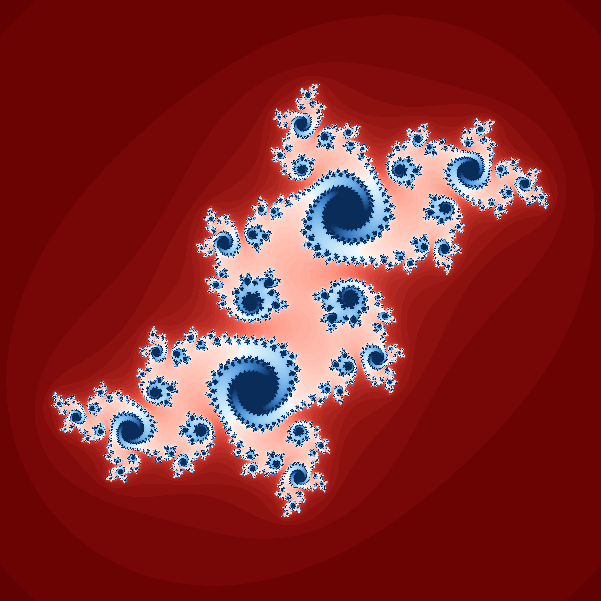

In [74]:
Image(cmap[data])

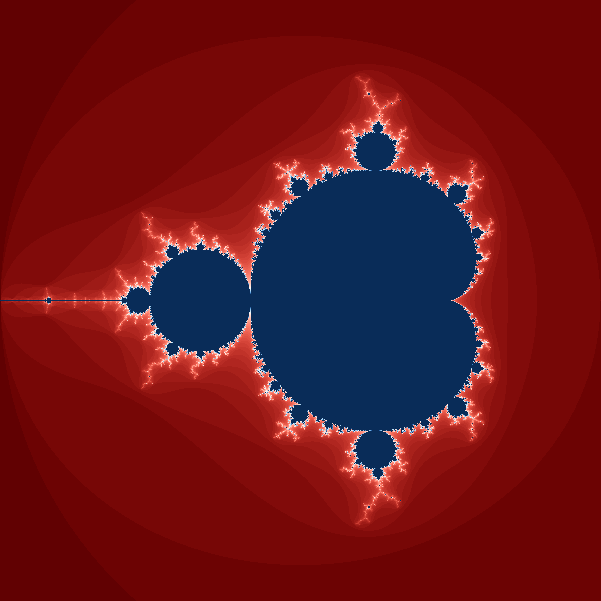

In [81]:
domain = -1.5:0.005:1.5

data = [julia(r + i*im, r + i*im) for r in domain-0.5, i in domain]

Image(cmap[data])

In [19]:
using Interact

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"r′",0.0,-0.1:0.01:0.1,".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.75, nactions=0),"i′",0.75,0.65:0.01:0.85,".3f",true)

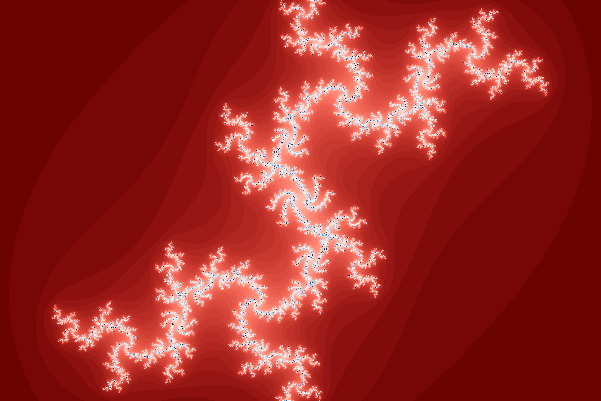

In [85]:

@manipulate for r′ = -0.1:0.01:0.1, i′ = 0.65:0.01:0.85
    Image(cmap[[julia(r + i*im, r′ + i′*im) for r=-1.5:.005:1.5, i=-1:.005:1]])
end

In [20]:
# let R = -1.5:.005:1.5, I = -1:.005:1
#     data = Array{RGB{U8}}(length(R), length(I))
#     img = Image(data)
    
#     @manipulate for r′ = -0.1:0.01:0.1, i′ = 0.65:0.01:0.85
#         for (j,r) in enumerate(R), (k,i) in enumerate(I)
#             data[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
#         end
        
#         img
#     end
# end

## Animation

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"r′",0.0,-0.1:0.01:0.1,".3f",true)

0.6731823368847564

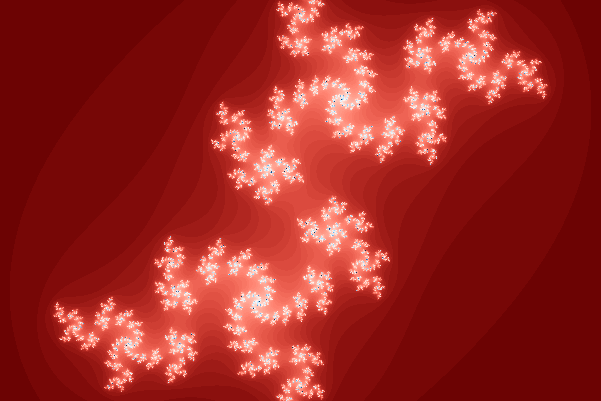

In [92]:
@manipulate for r′ = -0.1:0.01:0.1, i′ = map(_->0.65+0.5*sin(time())*0.25, fps(10))
    Image([cmap[julia(r + i*im, r′ + i′*im)] for r=-1.5:.005:1.5, i=-1:.005:1])
    end